Author: Carlos Roberto de Melo
    
Date: 12/11/2020

Goal: Parameterize MUSE ePSF.

In [13]:
#Import important packages

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from os import path

import mgefit
from mgefit.find_galaxy import find_galaxy
from mgefit.mge_fit_1d import mge_fit_1d
from mgefit.sectors_photometry import sectors_photometry
from mgefit.mge_fit_sectors import mge_fit_sectors
from mgefit.mge_print_contours import mge_print_contours
from mgefit.mge_fit_sectors_twist import mge_fit_sectors_twist
from mgefit.sectors_photometry_twist import sectors_photometry_twist
from mgefit.mge_print_contours_twist import mge_print_contours_twist

from mgefit.mge_fit_sectors_regularized import mge_fit_sectors_regularized

In [14]:
#Open the file with the psf

path = '/home/carlos/Desktop/SDP/Dynamics/Jampy/Data/' #Caminho da imagem
file = path+'muse_Epsf.fits'
hdu = fits.open(file) #Abrindo imagem
img = hdu[0].data #Pega os dados da img
img_data = hdu[0].data #Pega os dados da img

where_are_NaNs = np.isnan(img)
img[where_are_NaNs] = 0

In [15]:
#Proporties of the image

minlevel = 1000  #counts/px
scale = 0.2      #arcsec/px

 Pixels used: 159
 Peak Img[j, k]: 11 11
 Mean (j, k): 10.99 10.96
 Theta (deg): 42.0
 Astro PA (deg): 48.0
 Eps: 0.022
 Major axis (pix): 7.3


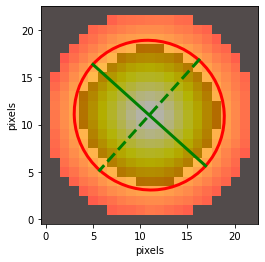

In [16]:
    # Here we use FIND_GALAXY directly inside the procedure. Usually you may want
    # to experiment with different values of the FRACTION keyword, before adopting
    # given values of Eps, Ang, Xc, Yc.
    
plt.clf()
f = find_galaxy(img, fraction=0.3, plot=1)
plt.show()  # Allow plot to appear on the screen

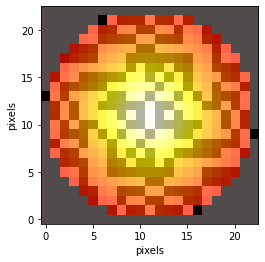

In [17]:
    # Perform psf photometry
plt.clf()
s = sectors_photometry(img, f.eps, f.theta, f.xpeak, f.ypeak,
                           minlevel=1e-5, plot=1)
plt.show()  # Allow plot to appear on the screen

Iteration: 1  chi2: 2.306  Nonzero: 7/15
Iteration: 11  chi2: 1.913  Nonzero: 5/15
Nonzero Gaussians: 4/15
Eliminating not useful Gaussians...
ngauss: 3           chi2: 1.91
Starting nonlinear fit...
Iteration: 1  chi2: 1.912  Nonzero: 3/3
Nonzero Gaussians: 3/3
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 0.41 seconds
  Total Iterations:  17
 Nonzero Gaussians:  3
  Unused Gaussians:  12
 Sectors used in the fit:  19
 Total number of points fitted:  168
 Chi2: 1.909 
 STDEV: 0.106 
 MEANABSDEV: 0.05177 
############################################
  Total_Counts  Sigma_Pixels      qObs
############################################
       634668      1.19146     0.969446
  3.23664e+06      2.10452     0.959482
  2.28843e+06      4.11451            1
++++++++++++++++++++++++++++++++++++++++++++
(minloop) qbounds=0.0000 1.0000
############################################
Iteration: 1  chi2: 2.306  Nonzero: 7/

Iteration: 121  chi2: 1.913  Nonzero: 5/15
Iteration: 131  chi2: 1.913  Nonzero: 5/15
Iteration: 141  chi2: 1.913  Nonzero: 5/15
Iteration: 151  chi2: 1.913  Nonzero: 5/15
Iteration: 161  chi2: 1.913  Nonzero: 5/15
Iteration: 171  chi2: 1.913  Nonzero: 5/15
Iteration: 181  chi2: 1.913  Nonzero: 5/15
Iteration: 191  chi2: 1.913  Nonzero: 5/15
Nonzero Gaussians: 5/15
Eliminating not useful Gaussians...
ngauss: 4           chi2: 1.91
ngauss: 3           chi2: 1.92
Starting nonlinear fit...
Iteration: 1  chi2: 1.915  Nonzero: 3/3
Nonzero Gaussians: 3/3
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 3.92 seconds
  Total Iterations:  200
 Nonzero Gaussians:  3
  Unused Gaussians:  12
 Sectors used in the fit:  19
 Total number of points fitted:  168
 Chi2: 1.909 
 STDEV: 0.106 
 MEANABSDEV: 0.05176 
############################################
  Total_Counts  Sigma_Pixels      qObs
################################

Iteration: 11  chi2: 2.173  Nonzero: 5/15
Nonzero Gaussians: 4/15
Eliminating not useful Gaussians...
ngauss: 3           chi2: 1.91
Starting nonlinear fit...
Iteration: 1  chi2: 1.912  Nonzero: 3/3
Nonzero Gaussians: 3/3
Eliminating not useful Gaussians...
All Gaussians are needed!
############################################
 Computation time: 0.42 seconds
  Total Iterations:  18
 Nonzero Gaussians:  3
  Unused Gaussians:  12
 Sectors used in the fit:  19
 Total number of points fitted:  168
 Chi2: 1.909 
 STDEV: 0.106 
 MEANABSDEV: 0.05176 
############################################
  Total_Counts  Sigma_Pixels      qObs
############################################
       634929      1.19143     0.969671
  3.23647e+06      2.10462     0.959464
  2.28834e+06      4.11456            1
++++++++++++++++++++++++++++++++++++++++++++
(minloop) qbounds=0.8000 1.0000
############################################
Iteration: 1  chi2: 2.306  Nonzero: 7/15
Iteration: 11  chi2: 2.104  Nonzero: 5

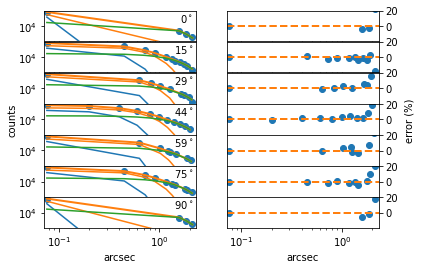

In [18]:
 # Do the actual MGE fit
    # *********************** IMPORTANT ***********************************
    # For the final publication-quality MGE fit one should include the line
    # "from mge_fit_sectors_regularized import mge_fit_sectors_regularized"
    # at the top of this file, rename mge_fit_sectors() into
    # mge_fit_sectors_regularized() and re-run the procedure.
    # See the documentation of mge_fit_sectors_regularized for details.
    # *********************************************************************

plt.clf()
m = mge_fit_sectors_regularized(s.radius, s.angle, s.counts, f.eps,
                        scale=scale, plot=1, bulge_disk=0, linear=0)
plt.show()  # Allow plot to appear on the screen

In [7]:
#Assume a circular PSF
m.sol[2][:] = 1.0   #Only for PSF_model

<Figure size 432x288 with 0 Axes>

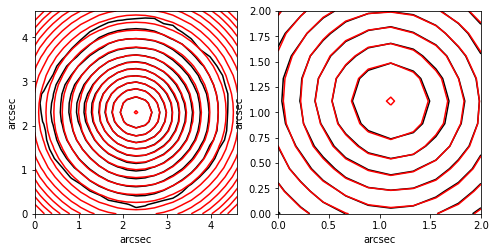

In [19]:
  # Show contour plots of the results
plt.clf()
plt.figure(figsize=(8,12))
plt.subplot(121)
ctc, model = mge_print_contours(img.clip(minlevel), f.theta, f.xpeak, f.ypeak, m.sol, scale=scale,
                       )

    # Extract the central part of the image to plot at high resolution.
    # The MGE is centered to fractional pixel accuracy to ease visual comparson.

n = 5
img = img[f.xpeak-n:f.xpeak+n, f.ypeak-n:f.ypeak+n]
xc, yc = n - f.xpeak + f.xmed, n - f.ypeak + f.ymed
plt.subplot(122)
mge_print_contours(img, f.theta, xc, yc, m.sol,
                      scale=scale)
plt.show()  # Allow plot to appear on the screen

In [20]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

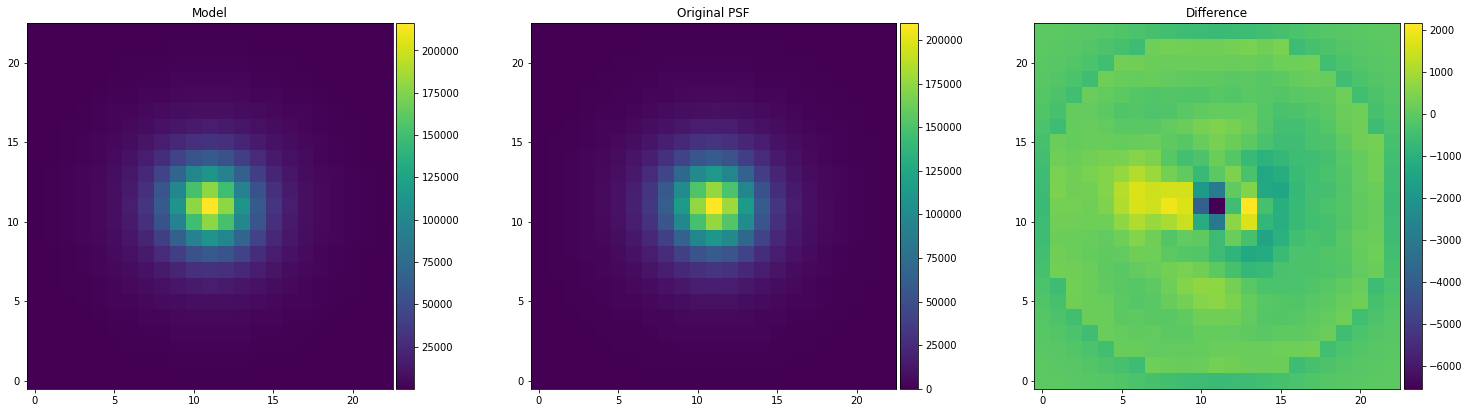

In [21]:
fig, axes = plt.subplots(1,3, figsize=(25, 7))
plt.subplots_adjust(hspace=0.0, wspace=0.3)


model_plt = axes[0].imshow(model, origin='lower', vmin=model.min(),  vmax=model.max())
axes[0].set_title("Model")

divider = make_axes_locatable(axes=axes[0])
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(model_plt, ax=axes[0], cax=cax)

origial_plt = axes[1].imshow(img_data, origin='lower', vmin=img_data.min(),  vmax=img_data.max())
axes[1].set_title("Original PSF")

divider = make_axes_locatable(axes=axes[1])
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(origial_plt, ax=axes[1], cax=cax)

diff_plt = axes[2].imshow(img_data - model, origin='lower')
axes[2].set_title("Difference")

divider = make_axes_locatable(axes=axes[2])
cax = divider.append_axes("right", size="5%", pad=0.05)

fig.colorbar(diff_plt, ax=axes[2], cax=cax)


plt.savefig("/home/carlos/Desktop/SDP/Dynamics/Jampy/Figs/MUSE_PSF-Model.png", fmt="png")

In [11]:
fits.writeto(filename=path+"Muse_psf_model.fits", data=model, overwrite=True)
fits.writeto(filename=path+"Muse_psf_difference.fits", data=(img_data - model), overwrite=True)

In [12]:
#Normalize PSF
norm_intensity = m.sol[0]/m.sol[0].sum()

#Save table with psf model values

np.savetxt("MUSE_Psf_model.txt", np.column_stack([norm_intensity, m.sol[1]]),
               header="Normalized I[counts] \t Sigma[counts]",fmt="%.10f \t\t\t %.10f" )

In [2]:
(1.1906013593 * 0.2,
2.1040488249 * 0.2,
4.1142713681 * 0.2)

(0.23812027186, 0.42080976498, 0.82285427362)